# Current Population Survey Decision Tree Classification
Predict whether an individuals family income is $50,000 or greater. Then predict whether an individual is married. 

We are using only the numerical columns as predictors, along with the column 'ismarried' (binary) when predicting family income.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_UPDATE.csv",
                  usecols=['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried', 'fam_income', 'faminc_50'])

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,ismarried,faminc_50
0,28,40,11,11,6,4,0,0
1,44,50,13,16,5,2,1,1
2,23,20,9,14,3,0,0,1
3,20,20,7,9,5,0,0,0
4,20,20,9,13,4,0,0,1


In [3]:
# Function to plot binary categories
def getColor(arr):
    colorList = [];
    for x in arr:
        color = "magenta" if x == 1 else "green"
        colorList.append(color)
    return colorList;        

# Function to display scores at each increasing tree-depths
# Using 5-fold cross validation
def getDecisionTreeCVScores(X, Y):
    nb = np.arange(1,15)
    scorelist = []
    for d in nb:
        T = tree.DecisionTreeClassifier(max_depth=d)
        scores = cross_val_score(T, X, Y,
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
    
    print("max score: ", max(scorelist))
    print("tree-depth =", scorelist.index(max(scorelist)) + 1)
    
# Function to display scores at each increasing tree depth
# using split data, returns graph
def getDecisionTreeScores(X, Y, xTest, yTest):
    depth = np.arange(1,15)
    score_train = []
    score_test = []
    print("Training", "   ", "Testing")
    for d in depth:
        T = tree.DecisionTreeClassifier(max_depth=d)
        T.fit(X,Y)
        s_train = T.score(X, Y)
        s_test = T.score(xTest, yTest)
        print(f"{d}:\t{s_train}:\t{s_test}")
        score_train.append(s_train)
        score_test.append(s_test)
    
    fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
    ax.plot(depth, score_train, label="training data")
    ax.plot(depth, score_test, label="testing data")
    ax.set_xlabel("tree depth")
    ax.set_ylabel("R2 score")
    fig.legend()
    plt.show()   
    
# function to plot Decision Tree prediction with 2 input variables
def plotDecisionTreeTwoVars(x, y, target, depth):
    colorList = getColor(data_train[target])
    T2 = tree.DecisionTreeClassifier(max_depth=depth)
    T2.fit(data_train[[x,y]],data_train[target])

    x_min, x_max = 10, 90
    y_min, y_max = 0, 18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                         np.linspace(y_min, y_max, 150))
    test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

    # Evaluate model
    colorPredict = getColor(T2.predict(test[['x1','x2']])) 

    fig,ax = plt.subplots(figsize=(8,8), dpi=100)
    ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
    ax.scatter(data_train[x], data_train[y],  color=colorList, s=20, alpha=.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("tree depth= " + str(depth))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show(fig)       

# Predict if Family Income >50,000

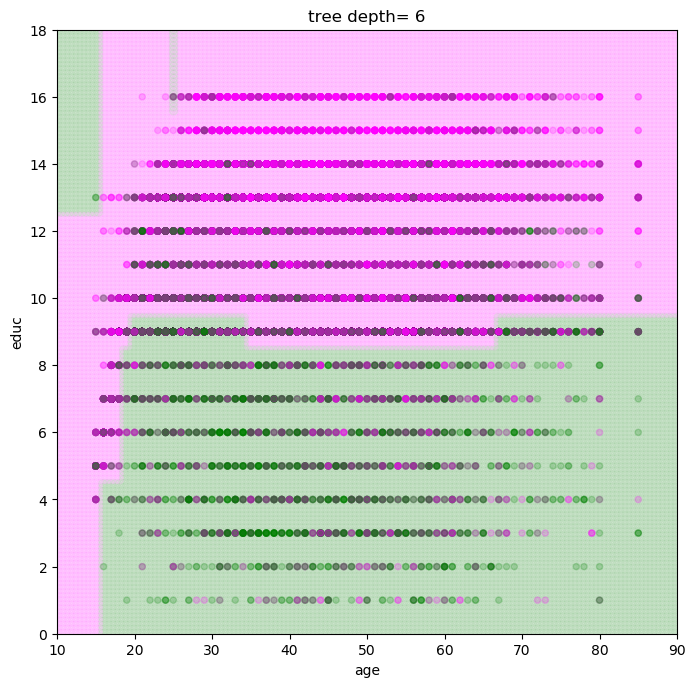

In [4]:
# Depth of 6
plotDecisionTreeTwoVars('age', 'educ', 'faminc_50', 6)       

# Score the model

We are going to score the model on a range of 1-15 tree-depths, first with split data then using using cross-validation.

First, lets try using Decision Tree Classification with only two input variables, 'age' and 'education' to predict if the family income is less than $50,000.

Training     Testing
1:	0.6663499389167911:	0.6629264319971043
2:	0.684652278177458:	0.6780381865894489
3:	0.6909415863535586:	0.6852773504660212
4:	0.6945613320664223:	0.6936023889240792
5:	0.6987692864576264:	0.6996651886707085
6:	0.6987919098683317:	0.6996651886707085
7:	0.6992896249038505:	0.696407564926251
8:	0.6998552101714854:	0.6949597321509365
9:	0.700624406135469:	0.6961360962808796
10:	0.7015519659743903:	0.6935118993756221
11:	0.7020949278313199:	0.6923355352456791
12:	0.702502149224017:	0.692245045697222
13:	0.7027057599203655:	0.6912496606641932
14:	0.7030451110809466:	0.6908877024703647


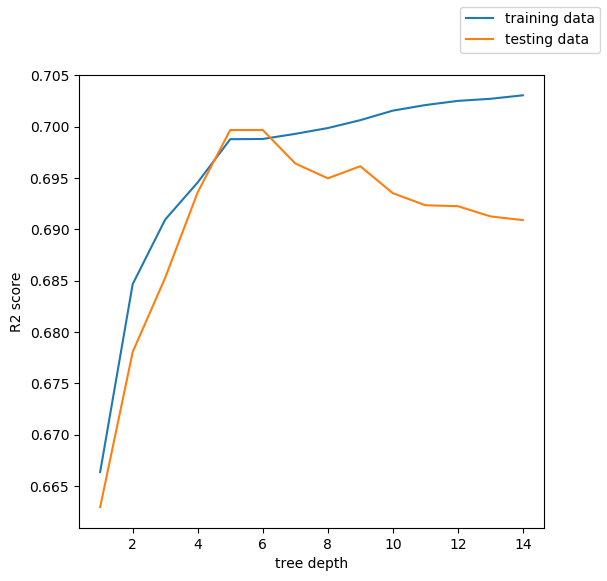

In [5]:
# Score using two input variables
getDecisionTreeScores(data_train[['age','educ']], data_train['faminc_50'],
                  data_test[['age','educ']], data_test['faminc_50'])

In [6]:
# Score using two input variables with cross validation
getDecisionTreeCVScores(data[['age','educ']], data['faminc_50'])

1:	0.6656652713806126
2:	0.6794564780075594
3:	0.6876006094327779
4:	0.6877635299276779
5:	0.6975369727601892
6:	0.6962154044330051
7:	0.6970660962685958
8:	0.6959079709008542
9:	0.6945324708027897
10:	0.6932474635288222
11:	0.693229280452497
12:	0.6936636139068925
13:	0.694152354099934
14:	0.6930121038983799
max score:  0.6975369727601892
tree-depth = 5


The model score peaked at around .6975.

We are going to add the rest of the numerical variables (and 'ismarried' binary variable) as inputs (besides fam_income, because this is a numerical representation of family income) to predict if the family income is over $50,000.

Training     Testing
1:	0.6663499389167911:	0.6629264319971043
2:	0.6884077643545541:	0.6859107773052212
3:	0.7190624858603684:	0.7210207221065967
4:	0.7320935704266776:	0.7321509365668265
5:	0.7372290846568028:	0.7352275812143697
6:	0.7402832451020316:	0.7386661840557416
7:	0.743948237636306:	0.7367659035381413
8:	0.7509614949549794:	0.7418333182517419
9:	0.7563684901135695:	0.7419238078001991
10:	0.7618207320935704:	0.7375803094742557
11:	0.7700330301796299:	0.7358610080535698
12:	0.777204651373241:	0.7332368111483124
13:	0.7853038324057735:	0.7315175097276264
14:	0.7949866521876838:	0.7269025427563116


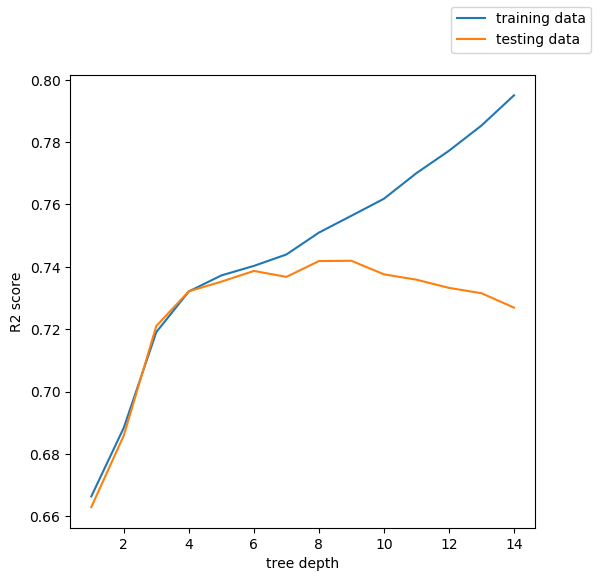

In [7]:
# Score with all numerical variables
getDecisionTreeScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_train['faminc_50'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_test['faminc_50'])

In [8]:
# Score with all numerical variables w/ cross validation
getDecisionTreeCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data['faminc_50'])

1:	0.6656652386242149
2:	0.69266827964628
3:	0.70537348721743
4:	0.7254627893464731
5:	0.7312002197954282
6:	0.7386204331951696
7:	0.7386930786960171
8:	0.739688430972648
9:	0.7395435346855448
10:	0.7364848585599223
11:	0.735218008157162
12:	0.733245349103355
13:	0.7281957260271281
14:	0.7238158615485342
max score:  0.739688430972648
tree-depth = 8


Using the variables seen above, the score for "family income greater than $50,000" peaked at .74.

Decision Tree Classification is slightly more effective than KNearest Neighbors when predicting if the family income is greater than 50,000. 
- (K Nearest Score) .7178 < (Decision Tree Score) .74

# Predict if an Individual is Married

Lets use all of the numerical variables to predict whether an individual is married

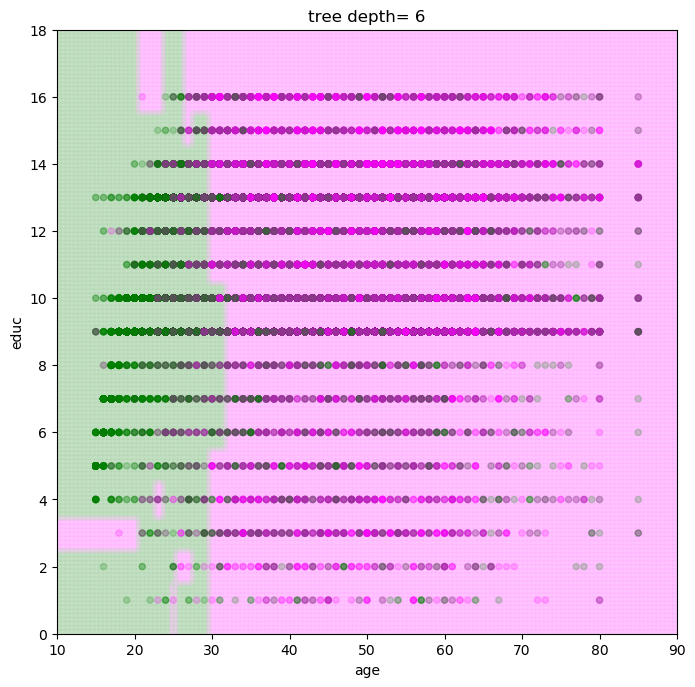

In [9]:
# Depth of 6
plotDecisionTreeTwoVars('age', 'educ', 'ismarried', 6)       

# Score the model

We are going to score the model on a range of 1-15 tree-depths, first with split data then using using cross-validation.

Training     Testing
1:	0.6883851409438487:	0.6884444846620216
2:	0.6883851409438487:	0.6884444846620216
3:	0.6940862404416089:	0.6938738575694507
4:	0.6949006832270033:	0.6965885440231653
5:	0.6953531514411113:	0.6962265858293367
6:	0.6956698791909869:	0.6957741380870509
7:	0.6968915433690783:	0.6966790335716225
8:	0.6974118818153024:	0.6957741380870509
9:	0.6981584543685806:	0.6944167948601937
10:	0.6985430523505723:	0.6942358157632793
11:	0.6989050269218587:	0.6931499411817935
12:	0.6994253653680829:	0.6912496606641932
13:	0.6998778335821908:	0.6906162338249933
14:	0.7002624315641827:	0.6903447651796217


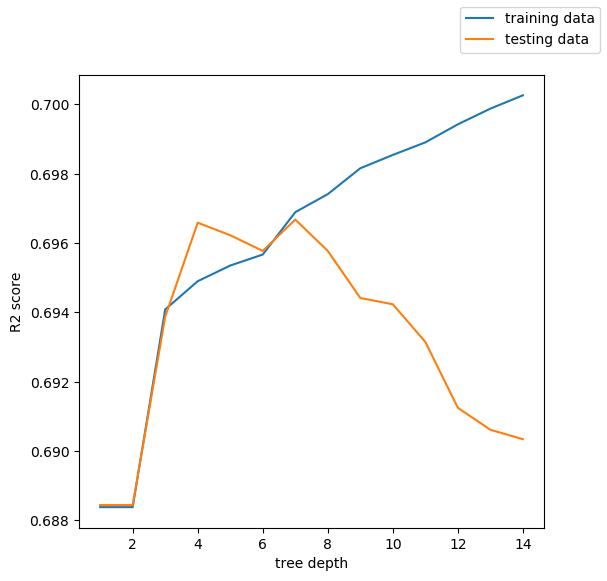

In [10]:
# Score using two input variables
getDecisionTreeScores(data_train[['age','educ']], data_train['ismarried'],
                  data_test[['age','educ']], data_test['ismarried'])

In [11]:
# Score using 2 input variables with cross validation
getDecisionTreeCVScores(data[['age','educ']], data['ismarried']) 

1:	0.6889760685853454
2:	0.689464712147014
3:	0.6936456306445927
4:	0.6950934896250253
5:	0.6949124761338934
6:	0.6943332463923946
7:	0.694242692968962
8:	0.6949849856956906
9:	0.6936637023491661
10:	0.6934283869398605
11:	0.6910574215555931
12:	0.6919080642565876
13:	0.6902249406392658
14:	0.6885237010962338
max score:  0.6950934896250253
tree-depth = 4


We are going to add the rest of the numerical variables as inputs to predict whether the individual is married.

Training     Testing
1:	0.6883851409438487:	0.6884444846620216
2:	0.784195285281209:	0.7844538955750611
3:	0.7861408986018732:	0.7871685820287757
4:	0.7874983032441971:	0.7885259252556329
5:	0.8033120673272702:	0.796217536874491
6:	0.8181304013393059:	0.8140439779205502
7:	0.827519116782046:	0.8235453805085513
8:	0.8334690737975657:	0.8261695774138087
9:	0.8393059137595584:	0.8315989503212379
10:	0.8440568300076919:	0.8287937743190662
11:	0.8495316953983982:	0.828069857931409
12:	0.8555721460567395:	0.8259885983168944
13:	0.8625401565540021:	0.821645099990951
14:	0.8704583503008914:	0.8197448194733509


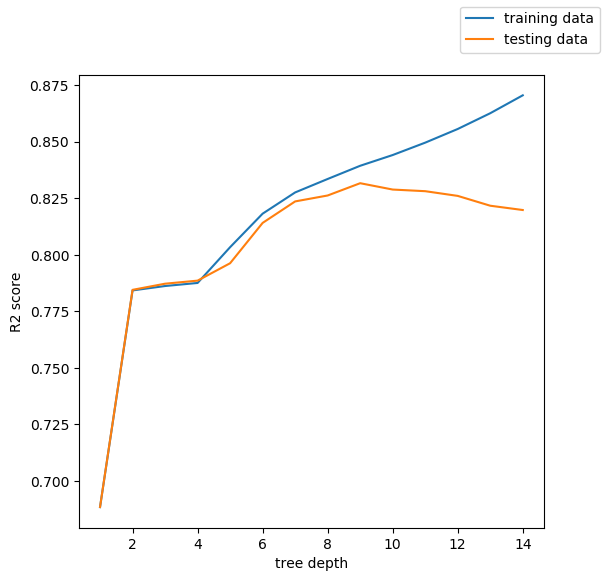

In [12]:
# Score with all numerical variables
getDecisionTreeScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_test['ismarried'])

In [13]:
# Score with all numerical variables using Cross Validation
getDecisionTreeCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data['ismarried'])

1:	0.6838906886254638
2:	0.7845907698203844
3:	0.787649594987616
4:	0.7879934945794302
5:	0.7983637540633288
6:	0.8145077757546153
7:	0.8234483871773444
8:	0.8277559304434273
9:	0.8298373030675139
10:	0.8299640195539315
11:	0.82918567022251
12:	0.8260004741488558
13:	0.8222539644453871
14:	0.8194849269389024
max score:  0.8299640195539315
tree-depth = 10


Using the variables seen above, the score for "Is this individual married" peaked at .83

Decision Tree Classification is more effective than KNearest Neighbors when predicting if an individual is married. 
- (KNearest Score) .7795 < (Decision Tree Score) .8310